# Introduction to Python for Geoscientists

This is a "Jupyter Notebook". Formerly an IPython Notebook. It is a good way to document workflows and analysis pipelines. You can have Python, R, Fortran, Julia, etc notebooks. This is a "Markdown" cell, you can write notes, equations in latex style, $E=\kappa A ^m (\nabla z)^n$, or embed figures. 

Today we are using a Python kernel to do some cool stuff with Geoscience data. The following cell is your first Python code

In [1]:
2+4*10

42

In [2]:
#This is a comment. This is for a human to read (so you remember what your code does!)
#Python ignores anything behind the '#'.

#The next line is an example of a 'variable'. Assign values using a single '=' sign.
time=145

In [3]:
#Now you can use that variable in different ways.... firstly print it out to the screen
print("The age of the sample is", time, " Million years")

The age of the sample is 145  Million years


In [4]:
#Make a new variable called 'endtime' and add a constant to our 'time' variable
endtime=time+56

In [5]:
#Nothing printed out above? Good. Jupyter Notebooks won't always do that so let's tell Python to print it.
print(endtime)

201


In [6]:
#Make a new 'string' variable
geological_age='Jurassic'

#Print out some useful information that includes our different variables
print("My sample is ", endtime, " Million years old from the", geological_age, " age.")

My sample is  201  Million years old from the Jurassic  age.


In [7]:
#Make a Python List object, similar to an array.
times=[1,4.5,5+3.2,geological_age,"Another string"]

print(times)

#There are many different types of data types and objects: 
#int, long, float, complex, String, Lists, Tuple, Dictionary, functions, etc

[1, 4.5, 8.2, 'Jurassic', 'Another string']


That is the basics. Now we are going to load in some data and manipulate it.

## Loading data

In [8]:
#First we have to load some modules to do the work for us.
#Modules are packages people have written so we do not have to re-invent everything!

#The first is NUMerical PYthon. A very popular matrix, math, array and data manipulation library.
import numpy

#Pandas is a module that is great for dealing with tables of data
import pandas

#This is a library for making figures (orignally based off Matlab plotting routines)
#We use the alias 'plt' because we don't want to type out the whole name everytime we reference it!
import matplotlib.pyplot as plt 

In [9]:
#Set the variable name for the file we are loading in. 
#It is in the 'data' directory, and the file is called EarthChemCU.txt. 
#We are currently working in /examples.
filename = '../data/EarthChemCU.txt'

#Now read in the data
chemdata=numpy.loadtxt(filename, delimiter=',')
#chemdata <- the name of a variable we are making that will hold the table of data
#filename <- this is the name of the variable we declared above
#delimiter <- this is a csv file

### Want more details about a command/function we use?

In [10]:
#Try this help command
help(numpy.loadtxt)

Help on function loadtxt in module numpy.lib.npyio:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file, str, or pathlib.Path
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings for Python 3k.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    comments : str or sequence, optional
        The characters or list o

### It is often a good idea to look at the data to have some idea with what you are working with

In [11]:
#What does the data look like. Print it out
print(chemdata)

[[  3.92583000e+01  -1.14992000e+02   1.11000000e+02   1.96000000e+04]
 [  3.92583000e+01  -1.14992000e+02   1.11000000e+02   1.57000000e+04]
 [  4.12060000e+01  -1.17272000e+02   1.05000000e+02   3.00000000e+00]
 ..., 
 [  2.00530000e+01   1.17419000e+02   0.00000000e+00   3.00000000e+01]
 [  2.00530000e+01   1.17419000e+02   0.00000000e+00   3.30000000e+01]
 [  2.00530000e+01   1.17419000e+02   0.00000000e+00   3.50000000e+01]]


In [12]:
#This is in the style: Latitude, Longitude(-180:180), Age(Ma), pp
#Print the dimensions of the data
print(chemdata.shape)

(207431, 4)


207431 rows! A good example for why we use Python and not something like Excel.

In [13]:
#Print the first row
print(chemdata[0,:])

[    39.2583   -114.992     111.      19600.    ]


In [14]:
#Print the third column. Note, Python counts from 0
print(chemdata[:,2])

[ 111.  111.  105. ...,    0.    0.    0.]


In [15]:
#Print the first two columns for row id 2, 5 and 6. 
print(chemdata[[2,5,6],0:2])

[[  41.206 -117.272]
 [  41.186 -117.417]
 [  41.177 -117.485]]


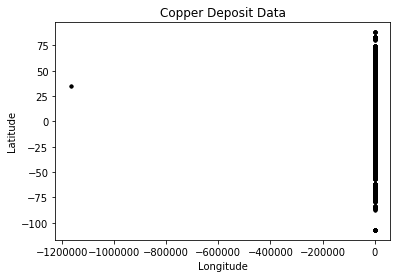

In [16]:
#Plot the lats and lons, i.e. the first column vs the second column
plt.plot(chemdata[:,1],chemdata[:,0],'k.')
plt.title('Copper Deposit Data')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

This does not look right... It is a messy dataset! This is not uncommon. 
Maybe the Lats/Lons are stored as Norhtings/Eastings for some samples. 
Maybe they are missing a decimal place.

Anyway, Python is a great tool to clean things up! Let's investigate further.

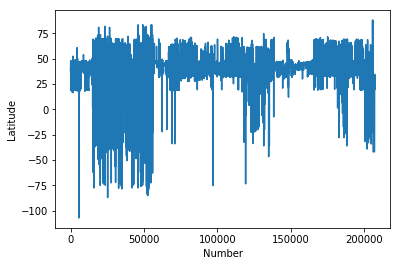

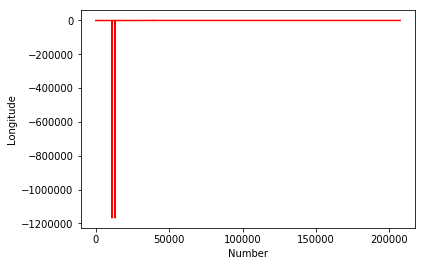

In [17]:
#Plot the Latitudes
plt.plot(chemdata[:,0])
plt.ylabel('Latitude')
plt.xlabel('Number')
plt.show()

#Plot the Longitudes
plt.plot(chemdata[:,1],'r')
plt.ylabel('Longitude')
plt.xlabel('Number')
plt.show()

In [18]:
#Clean up the data, remove anything outside lat lon extent

#Find all the "chemdata" column 1 (i.e. longitude) data points that are greater than -180, save it in a new variable
cudata=chemdata[chemdata[:,1]>-180]
#Repeat for less than 180
cudata2=cudata[cudata[:,1]<180]

#Repeat for latitudes less than 90
cudata3=cudata2[cudata2[:,0]<90]
#Repeat for greater than -90
cudata4=cudata3[cudata3[:,0]>-90]

print("We have removed", chemdata.shape[0]-cudata4.shape[0], "samples")

We have removed 47 samples


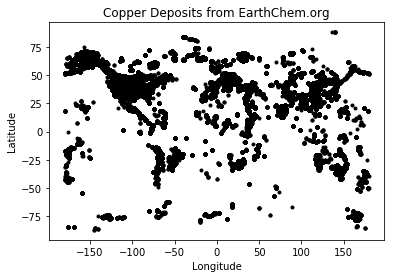

In [19]:
plt.plot(cudata4[:,1],cudata4[:,0],'k.')
plt.title('Copper Deposits from EarthChem.org')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()


/Users/nbutter/anaconda3/envs/pyforgeo/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/nbutter/anaconda3/envs/pyforgeo/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/nbutter/anaconda3/envs/pyforgeo/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


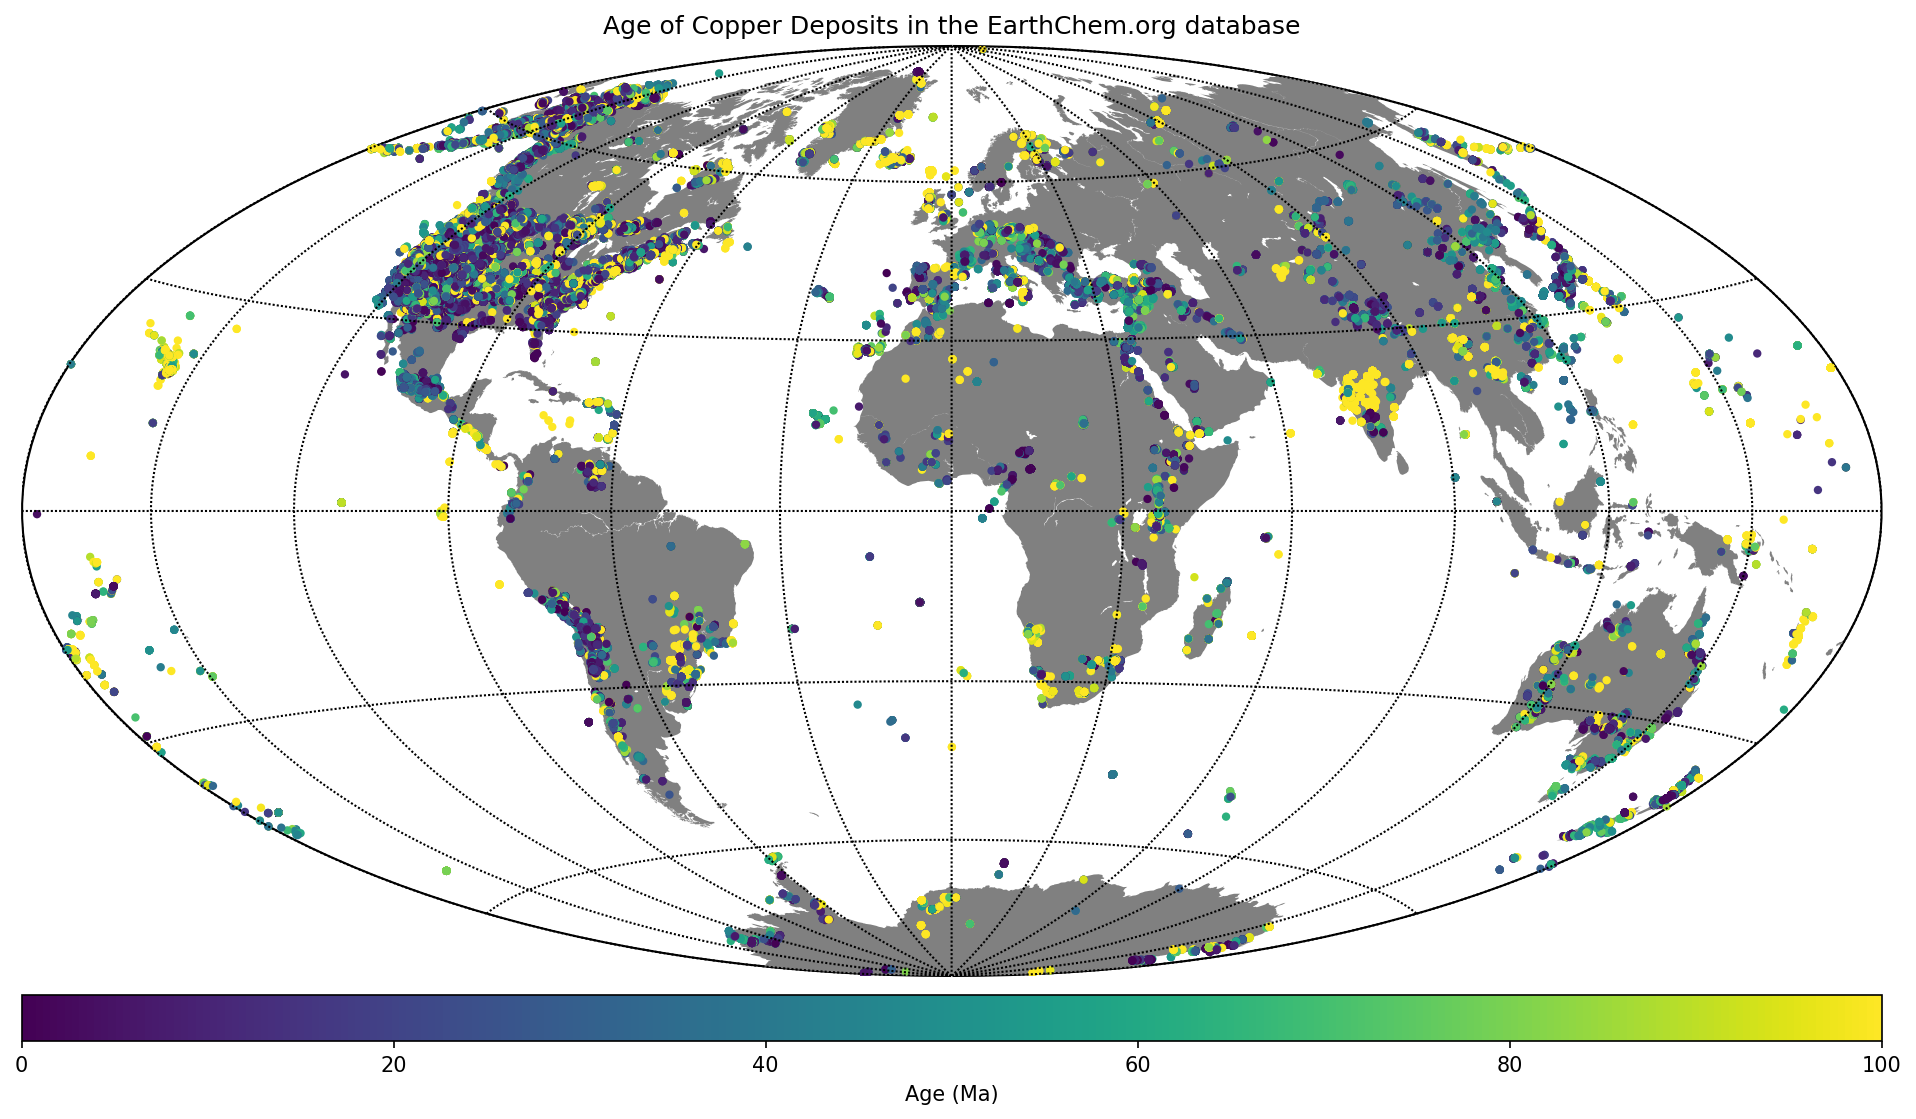

In [20]:
#Let's make a nicer map

#Import another module called Basemap - great for plotting things on globes
from mpl_toolkits.basemap import Basemap
from sklearn import preprocessing

#Make new variables from our array (so it is easier to see what we are doing)
lats=cudata4[:,0]
longs=cudata4[:,1]
age=cudata4[:,3]

#######
## Make the figure
#######

#Create a figure object
fig = plt.figure(figsize=(16,12),dpi=150)

#Make the basemap, shade it and put down some other map symbols
pmap = Basemap(projection='hammer', lat_0=0, lon_0=0, #You can break loooong commands over multiple lines
           resolution='l')
pmap.drawmapboundary(fill_color='white')
pmap.fillcontinents(color='grey', lake_color='white', zorder=0)
pmap.drawmeridians(numpy.arange(0, 360, 30))
pmap.drawparallels(numpy.arange(-90, 90, 30))

#compute native map projection coordinates of lat/lon grid.
xh, yh = pmap(longs, lats)

#Make a scatter plot of the data coloured by age. Restrict the colour range between 0 and 2000
#And also set the 'plot' as a variable so we can reference it
mapscat = pmap.scatter(xh,yh,marker=".",c=age,vmin=0,vmax=100)

#Add a colourbar, 
cbar=pmap.colorbar(mapscat,location='bottom')
cbar.set_label('Age (Ma)')

# Add a map title, and tell the figure to appear on screen
plt.title('Age of Copper Deposits in the EarthChem.org database')
plt.show()